# Import the Libraries

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# Import the libraries used in the code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Machine Learning/Project#1

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project#1


# Data Analysis/Visualizaion and Data Cleaning

https://www.kaggle.com/adamlouly/exploratory-data-analysis-on-wisdm

## Read the files

In [ ]:
# Reading individual files 
acc = pd.read_csv("./dataset/csv_files/watch_accel.csv")
gyro = pd.read_csv("./dataset/csv_files/watch_gyro.csv")

## Accelerometer of Smart-Watch

In [ ]:
# Checking the first 5 rows in the accel file
acc.head()

,subject_ID,activity_code,timestamp,x_acc,y_acc,z_acc
0,1608,A,789657572953540,9.084948,-0.461632,-0.8108862;
1,1608,A,789657622453540,7.181558,-0.772878,-0.583437;
2,1608,A,789657671953540,5.500828,1.934964,-0.17642274;
3,1608,A,789657721453540,5.184793,2.409016,-0.18121114;
4,1608,A,789657770953540,7.191135,0.541539,-0.20036475;


In [ ]:
# Analyzing numerical data
acc.describe()

,subject_ID,timestamp,x_acc,y_acc
count,3.777046e+06,3.777046e+06,3.777046e+06,3.777046e+06
mean,1.626367e+03,6.072131e+14,3.831725e-01,-4.478842e+00
std,1.441509e+01,6.783433e+14,6.965694e+00,5.327486e+00
min,1.600000e+03,1.622154e+12,-7.063152e+01,-7.847761e+01
25%,1.614000e+03,8.371907e+13,-4.889259e+00,-8.045864e+00
50%,1.628000e+03,3.512653e+14,-4.186860e-01,-4.567987e+00
75%,1.639000e+03,9.100427e+14,5.705233e+00,-1.589451e+00
max,1.650000e+03,2.724599e+15,5.211323e+01,3.560197e+01


In [ ]:
# Getting information about each column
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777046 entries, 0 to 3777045
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_acc          float64
 4   y_acc          float64
 5   z_acc          object 
dtypes: float64(2), int64(2), object(2)
memory usage: 172.9+ MB


In [ ]:
# Checking null values
acc.isnull().values.any()

False

In [ ]:
# Dropping the empty rows
acc = acc.dropna()

In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777046 entries, 0 to 3777045
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_acc          float64
 4   y_acc          float64
 5   z_acc          object 
dtypes: float64(2), int64(2), object(2)
memory usage: 201.7+ MB


In [ ]:
# ref : https://www.kaggle.com/adamlouly/exploratory-data-analysis-on-wisdm
# Converting the object data type into float
import re
acc['z_acc'] = acc['z_acc'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
acc['z_acc'] = acc['z_acc'].map(lambda x: x[2:-2])
acc['z_acc'] = pd.to_numeric(acc['z_acc'],errors='coerce')

In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777046 entries, 0 to 3777045
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_acc          float64
 4   y_acc          float64
 5   z_acc          float64
dtypes: float64(3), int64(2), object(1)
memory usage: 201.7+ MB


In [ ]:
acc1 = acc[["x_acc", "y_acc", "z_acc"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c972ac90>,
      dtype=object)

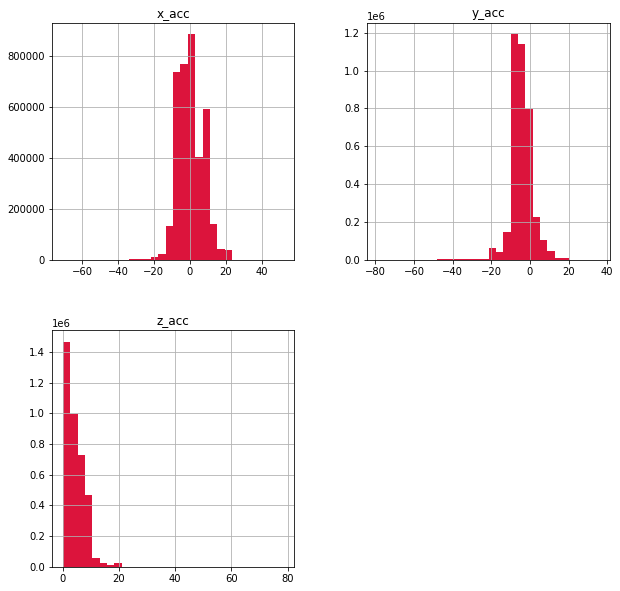

In [ ]:
# Histogram
acc1.hist(bins=30, figsize=(10,10), color="crimson")

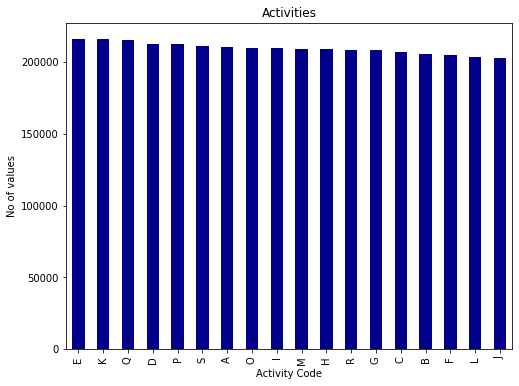

In [ ]:
# Bar graph
acc['activity_code'].value_counts().plot(kind='bar', pd.plotting.scatter_matrix(acc2, figsize=(10,10), color ="salmon"))

In [ ]:
# Counts for activity
print(acc["activity_code"].value_counts())

E    216529
K    215879
Q    215365
D    213018
P    212810
S    211335
A    210495
O    210107
I    210048
M    209491
H    209483
R    208734
G    208720
C    207312
B    205787
F    205137
L    203684
J    203112
Name: activity_code, dtype: int64


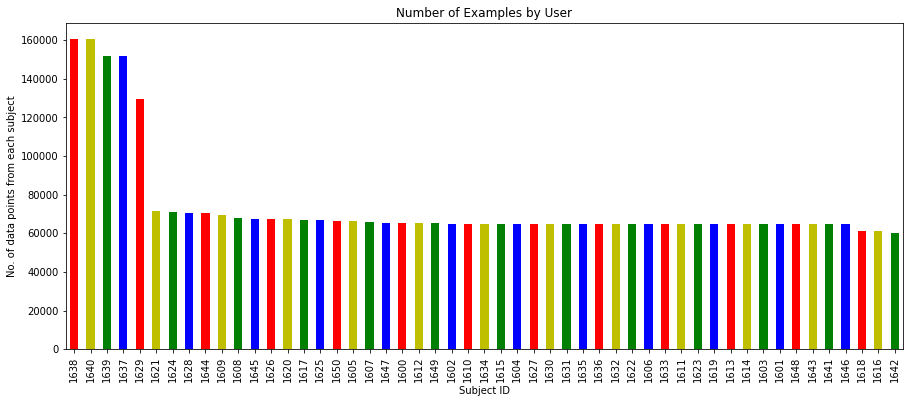

In [ ]:
# Bar plot for the subjects
acc['subject_ID'].value_counts().plot(kind='bar', title='Number of Examples by User',color=['r','y','g','b'], figsize=(15,6),xlabel="Subject ID", ylabel="No. of data points from each subject")

In [ ]:
# Counting subjects
acc['subject_ID'].value_counts()

1638    160799
1640    160788
1639    151846
1637    151844
1629    129808
1621     71372
1624     71272
1628     70384
1644     70358
1609     69657
1608     68198
1645     67696
1626     67306
1620     67194
1617     67012
1625     66706
1650     66592
1605     66195
1607     65830
1647     65526
1600     65462
1612     65286
1649     65166
1602     64985
1610     64915
1634     64906
1615     64905
1604     64904
1627     64897
1630     64897
1631     64896
1635     64893
1636     64892
1632     64892
1622     64891
1606     64890
1633     64890
1611     64888
1623     64875
1619     64868
1613     64867
1614     64865
1603     64865
1601     64840
1648     64833
1643     64827
1641     64821
1646     64808
1618     61298
1616     61285
1642     60156
Name: subject_ID, dtype: int64

In [ ]:
# Plotting time-series data

def plot_activity_acc(activity, acc):
    data = acc[acc['activity_code'] == activity][['x_acc', 'y_acc', 'z_acc']][:200]
    axis = data["x_acc"].plot(subplots=True, 
                     title=activity,color="b")
    axis = data["y_acc"].plot(subplots=True, 
                 title=activity,color="r")
    axis = data["z_acc"].plot(subplots=True, 
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

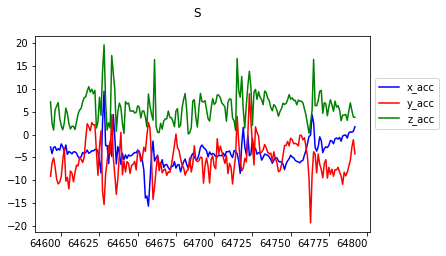

In [ ]:
plot_activity_acc("S", acc)

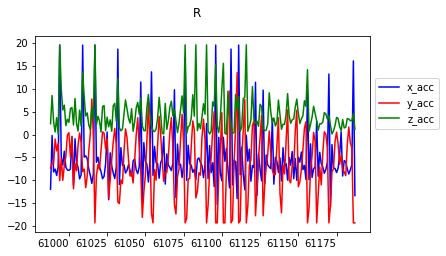

In [ ]:
plot_activity_acc("R", acc)

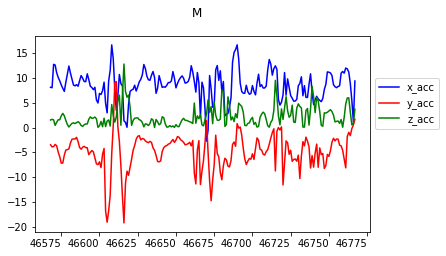

In [ ]:
plot_activity_acc("M", acc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c8243a50>,
      dtype=object)

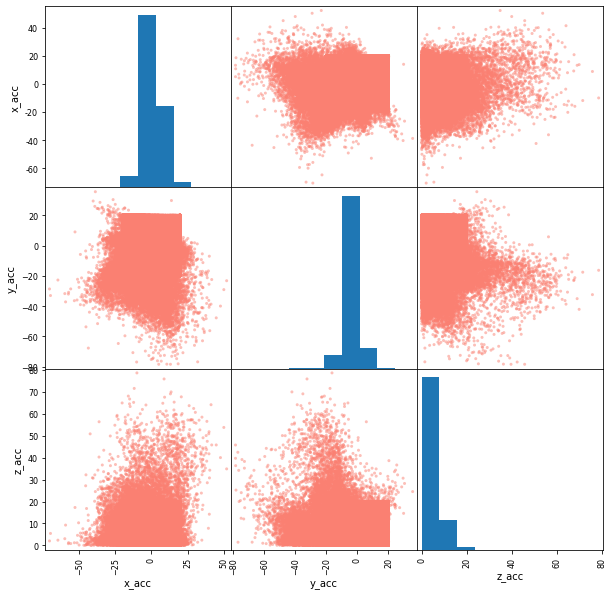

In [ ]:
# Scatter plot
pd.plotting.scatter_matrix(acc1, figsize=(10,10), color ="salmon")

## Gyroscope of Smart-Watch

In [ ]:
# first 5 rows
gyro.head()

,subject_ID,activity_code,timestamp,x_gyro,y_gyro,z_gyro
0,1601,A,1896411611733301,0.703360,-0.436308,-0.9538892;
1,1601,A,1896411661695801,0.254884,-0.424590,-0.99330395;
2,1601,A,1896411711658874,0.301756,-0.222190,-0.9496281;
3,1601,A,1896411761623926,0.287907,-0.141230,-1.0955694;
4,1601,A,1896411811593717,0.402956,0.272093,-1.0060872;


In [ ]:
# analyzing numerical data
gyro.describe()

,subject_ID,timestamp,x_gyro,y_gyro
count,3.440342e+06,3.440342e+06,3.440342e+06,3.440342e+06
mean,1.625184e+03,6.281344e+14,-2.711540e-02,-2.835123e-02
std,1.456469e+01,6.928139e+14,1.567850e+00,1.487365e+00
min,1.600000e+03,1.622203e+12,-3.491730e+01,-3.490016e+01
25%,1.613000e+03,8.363508e+13,-3.109857e-01,-1.829157e-01
50%,1.626000e+03,3.735870e+14,4.990764e-04,8.655274e-04
75%,1.638000e+03,9.097693e+14,2.891027e-01,2.024319e-01
max,1.650000e+03,2.724599e+15,3.490542e+01,3.406907e+01


In [ ]:
# checking null values
gyro.isnull().values.any()

False

In [ ]:
# column description
gyro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440342 entries, 0 to 3440341
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_gyro         float64
 4   y_gyro         float64
 5   z_gyro         object 
dtypes: float64(2), int64(2), object(2)
memory usage: 157.5+ MB


In [ ]:
# converting object data type into float
# ref : https://www.kaggle.com/adamlouly/exploratory-data-analysis-on-wisdm
import re
gyro['z_gyro'] = gyro['z_gyro'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
gyro['z_gyro'] = gyro['z_gyro'].map(lambda x: x[2:-2])
gyro['z_gyro'] = pd.to_numeric(gyro['z_gyro'],errors='coerce')

In [ ]:
gyro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440342 entries, 0 to 3440341
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_gyro         float64
 4   y_gyro         float64
 5   z_gyro         float64
dtypes: float64(3), int64(2), object(1)
memory usage: 157.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c896b0d0>,
      dtype=object)

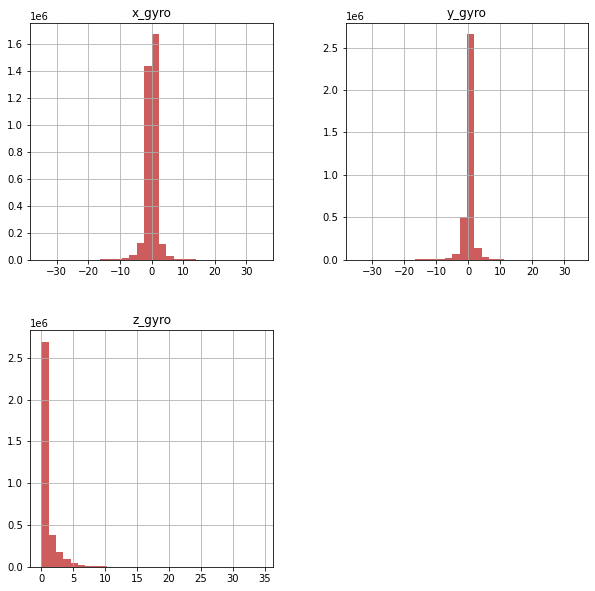

In [ ]:
# Histogram
gyro1.hist(bins=30, figsize=(10,10), color="indianred")

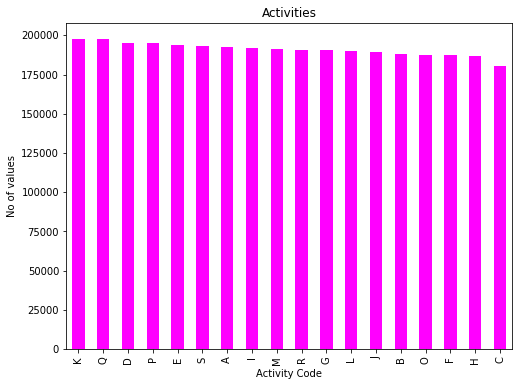

In [ ]:
# Bar graph
gyro['activity_code'].value_counts().plot(kind='bar', figsize=(8,6) ,title='Activities',xlabel="Activity Code", ylabel="No of values", color="magenta")

In [ ]:
# Activity count
gyro['activity_code'].value_counts()

K    197917
Q    197403
D    195050
P    194845
E    194103
S    193373
A    192531
I    192085
M    191535
R    190776
G    190759
L    190191
J    189609
B    187833
O    187684
F    187175
H    187057
C    180416
Name: activity_code, dtype: int64

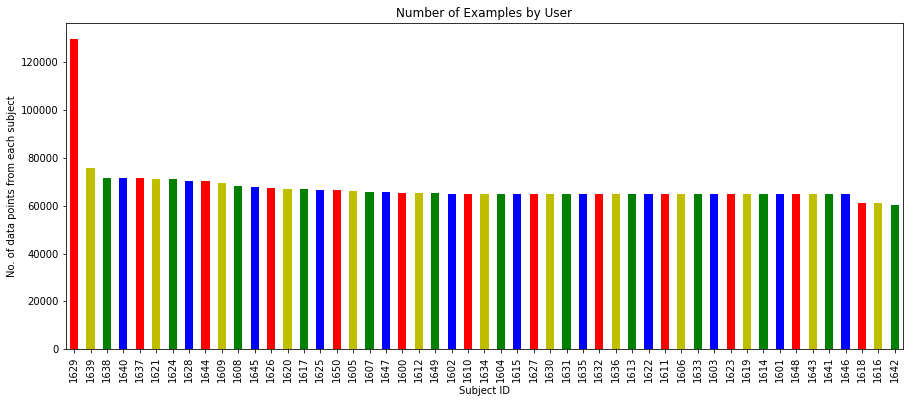

In [ ]:
# Subject count
gyro['subject_ID'].value_counts().plot(kind='bar', title='Number of Examples by User',color=['r','y','g','b'], figsize=(15,6),xlabel="Subject ID", ylabel="No. of data points from each subject")

In [ ]:
# plotting time series data

def plot_activity(activity, gyro):
    data = gyro[gyro['activity_code'] == activity][['x_gyro', 'y_gyro', 'z_gyro']][:200]
    axis = data["x_gyro"].plot(subplots=True, 
                     title=activity,color="b")
    axis = data["y_gyro"].plot(subplots=True, 
                 title=activity,color="r")
    axis = data["z_gyro"].plot(subplots=True, 
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

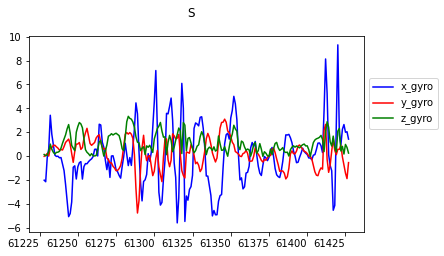

In [ ]:
plot_activity("S", gyro)

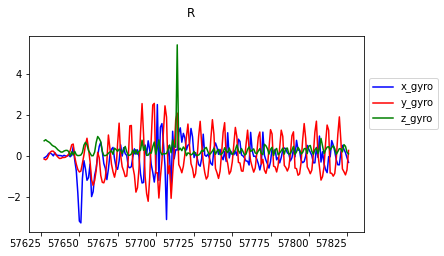

In [ ]:
plot_activity("R", gyro)

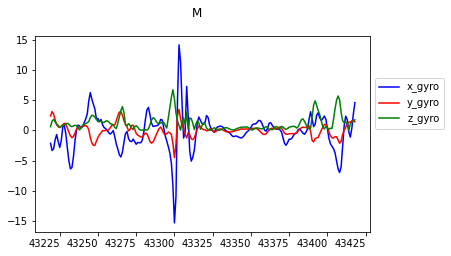

In [ ]:
plot_activity("M", gyro)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c7f1ce50>,
      dtype=object)

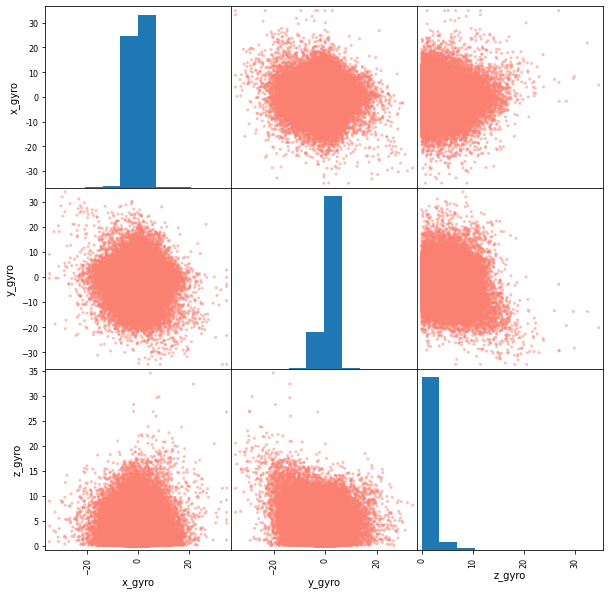

In [ ]:
# scatter plot
pd.plotting.scatter_matrix(gyro1, figsize=(10,10), color ="salmon")

# Combine the cvs files 
This section is ran only for once during the combination.

In [ ]:
#whole_watch_data = pd.merge(acc, gyro, on=["subject_ID", "activity_code", "timestamp"])

In [ ]:
#whole_watch_data.head()

,subject_ID,activity_code,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,1608,A,789657622453540,7.181558,-0.772878,0.583437,1.975182,0.124283,3.194493
1,1608,A,789657671953540,5.500828,1.934964,0.176423,1.472378,0.404447,2.381696
2,1608,A,789657721453540,5.184793,2.409016,0.181211,0.345328,0.300051,1.506048
3,1608,A,789657770953540,7.191135,0.541539,0.200365,-1.170543,-0.169730,0.205831
4,1608,A,789657820453540,12.685827,-0.317980,1.253813,-1.899184,-0.529790,3.083111


In [ ]:
#whole_watch_data.to_csv("whole_watch_data.csv")

# Read the Combined CSV file

In [ ]:
# read the combined files
whole_watch_data = pd.read_csv("./dataset/csv_files/whole_watch_data.csv", index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
# first 5 rows 
whole_watch_data.head()

,subject_ID,activity_code,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,1608,A,789657622453540,7.181558,-0.772878,0.583437,1.975182,0.124283,3.194493
1,1608,A,789657671953540,5.500828,1.934964,0.176423,1.472378,0.404447,2.381696
2,1608,A,789657721453540,5.184793,2.409016,0.181211,0.345328,0.300051,1.506048
3,1608,A,789657770953540,7.191135,0.541539,0.200365,-1.170543,-0.169730,0.205831
4,1608,A,789657820453540,12.685827,-0.317980,1.253813,-1.899184,-0.529790,3.083111


In [ ]:
# column description
whole_watch_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368542 entries, 0 to 3368541
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_ID     int64  
 1   activity_code  object 
 2   timestamp      int64  
 3   x_acc          float64
 4   y_acc          float64
 5   z_acc          float64
 6   x_gyro         float64
 7   y_gyro         float64
 8   z_gyro         float64
dtypes: float64(6), int64(2), object(1)
memory usage: 257.0+ MB


In [ ]:
# numerical data description
whole_watch_data.describe()

,subject_ID,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
count,3.368542e+06,3.368542e+06,3.368542e+06,3.368542e+06,3.368542e+06,3.368542e+06,3.368542e+06,3.368542e+06
mean,1.624538e+03,6.406445e+14,6.408707e-01,-4.348978e+00,4.320252e+00,-2.924606e-02,-3.091152e-02,8.452336e-01
std,1.436045e+01,6.904265e+14,7.031077e+00,5.286841e+00,3.471940e+00,1.592606e+00,1.505937e+00,1.413812e+00
min,1.600000e+03,1.622203e+12,-5.739664e+01,-6.197353e+01,0.000000e+00,-3.491730e+01,-3.490016e+01,0.000000e+00
25%,1.612000e+03,8.461248e+13,-4.559607e+00,-7.929895e+00,1.503559e+00,-3.382441e-01,-1.929766e-01,4.425222e-02
50%,1.625000e+03,3.794272e+14,-3.497031e-01,-4.486435e+00,3.555390e+00,-3.328951e-05,4.990764e-04,2.443488e-01
75%,1.635000e+03,9.019450e+14,6.366594e+00,-1.624466e+00,6.536320e+00,3.135510e-01,2.152204e-01,1.010480e+00
max,1.650000e+03,2.724599e+15,3.576483e+01,2.303530e+01,4.898054e+01,3.490542e+01,3.406907e+01,3.454896e+01


In [ ]:
# Input
X = whole_watch_data[["x_acc", "y_acc", "z_acc", "x_gyro", "y_gyro", "z_gyro"]]

In [ ]:
X.shape

(3368542, 6)

In [ ]:
# converting alphabetical output into numerical values
whole_watch_data["labels"] = whole_watch_data.activity_code.factorize()[0]

In [ ]:
whole_watch_data.head()

,subject_ID,activity_code,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro,labels
0,1608,A,789657622453540,7.181558,-0.772878,0.583437,1.975182,0.124283,3.194493,0
1,1608,A,789657671953540,5.500828,1.934964,0.176423,1.472378,0.404447,2.381696,0
2,1608,A,789657721453540,5.184793,2.409016,0.181211,0.345328,0.300051,1.506048,0
3,1608,A,789657770953540,7.191135,0.541539,0.200365,-1.170543,-0.169730,0.205831,0
4,1608,A,789657820453540,12.685827,-0.317980,1.253813,-1.899184,-0.529790,3.083111,0


In [ ]:
# labels 
whole_watch_data.labels.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [ ]:
# Output
y = whole_watch_data["labels"]

In [ ]:
# Counts for each label
digits, counts = np.unique(y, return_counts = True)

distribution = dict(zip(digits, counts)) #to check the numbler of datapoints for each digit in y train
print(distribution )

{0: 186149, 1: 181618, 2: 183264, 3: 192594, 4: 195324, 5: 177295, 6: 186025, 7: 185394, 8: 186339, 9: 188713, 10: 195004, 11: 185756, 12: 185427, 13: 184011, 14: 188670, 15: 192771, 16: 185821, 17: 188367}


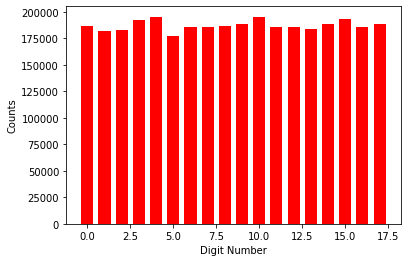

In [ ]:
# Count plot for each label
plt.bar(list(distribution.keys()),distribution.values(),width =0.7, color="r")
plt.xlabel('Digit Number') #bar graph for checking the distribution 
plt.ylabel('Counts')
plt.show()

In [ ]:
# Actual names of labels from the research paper
activities = ['walking', 'jogging', 'stairs', 'sitting', 'standing', 'typing', 
              'brushing teeth', 'eating soup', 'eating chips', 'eating pasta', 
              'drinking', 'eating sandwich', 'kicking', 'playing catch', 
              'dribblinlg', 'writing', 'clapping', 'folding clothes']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f622e8b86d0>,
      dtype=object)

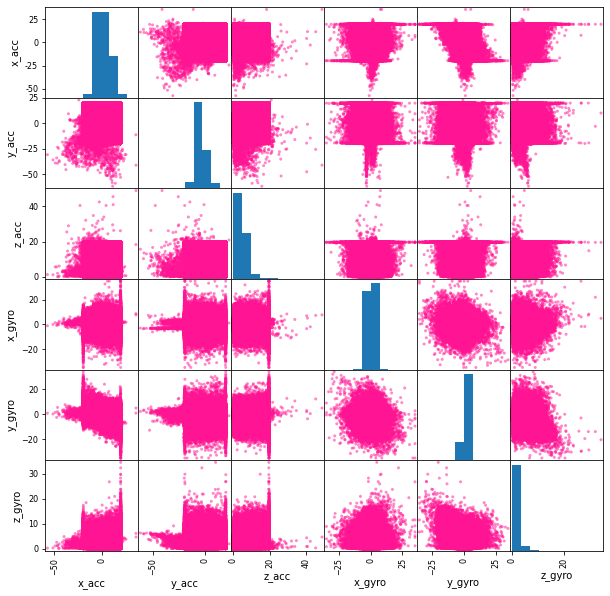

In [ ]:
# Scatter plot
pd.plotting.scatter_matrix(X, figsize=(10,10), color ="deeppink")

# Divide the dataset into Train, Validation and Test sets

In [ ]:
# Split into Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
# Print the size
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("---***---")
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (2694833, 6)
X_test:  (673709, 6)
---***---
y_train:  (2694833,)
y_test:  (673709,)


In [ ]:
# Split into Train and Validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Print the size 
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)
print("---***---")
print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X_train:  (2155866, 6)
X_val:  (538967, 6)
---***---
y_train:  (2155866,)
y_val:  (538967,)


# Building Non-linear parameters

For increasing the features and adding non-linearity

In [ ]:
X.head()

,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,7.181558,-0.772878,0.583437,1.975182,0.124283,3.194493
1,5.500828,1.934964,0.176423,1.472378,0.404447,2.381696
2,5.184793,2.409016,0.181211,0.345328,0.300051,1.506048
3,7.191135,0.541539,0.200365,-1.170543,-0.169730,0.205831
4,12.685827,-0.317980,1.253813,-1.899184,-0.529790,3.083111


In [ ]:
#take X as an non-linear variable
X_non = X.loc[:]

In [ ]:
# creating non-linear columns
X_non["x"] = X_non["x_acc"] * X_non["x_gyro"]
X_non["y"] = X_non["y_acc"] * X_non["y_gyro"]
X_non["z"] = X_non["z_acc"] * X_non["z_gyro"]
X_non.head()

,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro,x,y,z
0,7.181558,-0.772878,0.583437,1.975182,0.124283,3.194493,14.184886,-0.096055,1.863785
1,5.500828,1.934964,0.176423,1.472378,0.404447,2.381696,8.099297,0.782591,0.420185
2,5.184793,2.409016,0.181211,0.345328,0.300051,1.506048,1.790453,0.722828,0.272913
3,7.191135,0.541539,0.200365,-1.170543,-0.169730,0.205831,-8.417535,-0.091916,0.041241
4,12.685827,-0.317980,1.253813,-1.899184,-0.529790,3.083111,-24.092723,0.168463,3.865646


In [ ]:
# divide the dataset
X_non_train, X_non_test, y_non_train, y_non_test = train_test_split(X_non, y, test_size=0.2, random_state=50)
X_non_train, X_non_val, y_non_train, y_non_val = train_test_split(X_non_train, y_non_train, test_size=0.2, random_state=42)

# Feature Extraction

##1) PCA 

In [ ]:
# Feature Selection or reduction
pca = PCA(n_components=3, svd_solver ='arpack')
X_reduced = pca.fit_transform(scale(X))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

(3, 6)


,0,1,2
0,0.611174,-0.288769,-0.058745
1,0.099818,0.571444,0.101766
2,0.116266,0.529107,0.609903
3,0.020489,0.432139,-0.757636
4,-0.465150,-0.314482,0.180457


In [ ]:
# reduced input with a new set of features
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(3368542, 3)


,0,1,2
0,1.521413,-0.200003,-1.432014
1,0.962536,-0.005331,-1.214810
2,0.577024,-0.127519,-0.732666
3,0.270891,-0.578219,-0.197526
4,2.134132,-1.177098,0.406373


In [ ]:
# divide the dataset
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_reduced, y, test_size=0.2, random_state=50)
X_pca_train, X_pca_val, y_pca_train, y_pca_val = train_test_split(X_pca_train, y_pca_train, test_size=0.2, random_state=42)

# Linear Models

## [a] Logistic Regression

In [ ]:
logis_regr = LogisticRegression(solver="newton-cg")

In [ ]:
# Fit the training data
logis_regr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict and check the training accuracy
y_pred = logis_regr.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 24.901779609678893%


In [ ]:
# Predict using validation set
y_pred = logis_regr.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        walking       0.31      0.40      0.35     29627
        jogging       0.28      0.26      0.27     28844
         stairs       0.22      0.08      0.12     29408
        sitting       0.08      0.06      0.07     30908
       standing       0.28      0.62      0.39     31259
         typing       0.26      0.68      0.38     28543
 brushing teeth       0.22      0.55      0.31     29782
    eating soup       0.19      0.26      0.22     29614
   eating chips       0.09      0.01      0.01     29687
   eating pasta       0.27      0.20      0.23     30146
       drinking       0.09      0.01      0.02     31333
eating sandwich       0.00      0.00      0.00     29596
        kicking       0.26      0.18      0.22     29538
  playing catch       0.23      0.04      0.07     29159
     dribblinlg       0.30      0.23      0.26     30090
        writing       0.30      0.70      0.42     31306
       clapping       0.21    

In [ ]:
# Test accuracy
y_pred = logis_regr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 24.935543387426915%


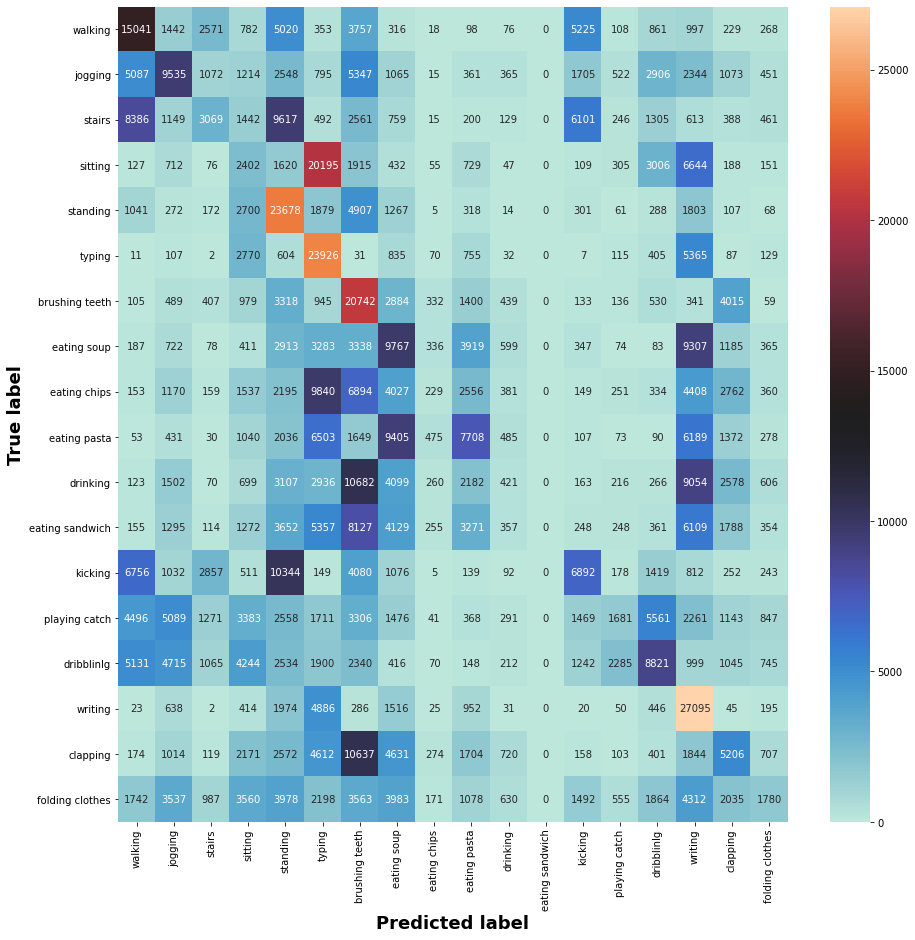

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="icefire", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

### Using non-linear features

In [ ]:
# ref: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html

log_regr = LogisticRegression(solver='newton-cg',tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000)

In [ ]:
# fit the training set
print(log_regr.fit(X_non_train,y_non_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=10000, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1e-06, verbose=0,
                   warm_start=True)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
# Check the training accuracy
y_pred = log_regr.predict(X_non_train)
accuracy = accuracy_score(y_non_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 25.20462774588031%


In [ ]:
# Validation
y_pred = log_regr.predict(X_non_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_non_val, y_pred)*100
print(classification_report(y_non_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        walking       0.32      0.39      0.35     29627
        jogging       0.29      0.27      0.28     28844
         stairs       0.22      0.09      0.13     29408
        sitting       0.08      0.07      0.07     30908
       standing       0.29      0.61      0.39     31259
         typing       0.26      0.69      0.38     28543
 brushing teeth       0.22      0.55      0.32     29782
    eating soup       0.18      0.24      0.21     29614
   eating chips       0.09      0.01      0.01     29687
   eating pasta       0.26      0.21      0.23     30146
       drinking       0.09      0.01      0.02     31333
eating sandwich       0.00      0.00      0.00     29596
        kicking       0.26      0.20      0.22     29538
  playing catch       0.18      0.05      0.08     29159
     dribblinlg       0.36      0.28      0.32     30090
        writing       0.30      0.69      0.42     31306
       clapping       0.21    

In [ ]:
# Test accuracy
y_pred = log_regr.predict(X_non_test)
accuracy = accuracy_score(y_non_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 25.207916177459406%


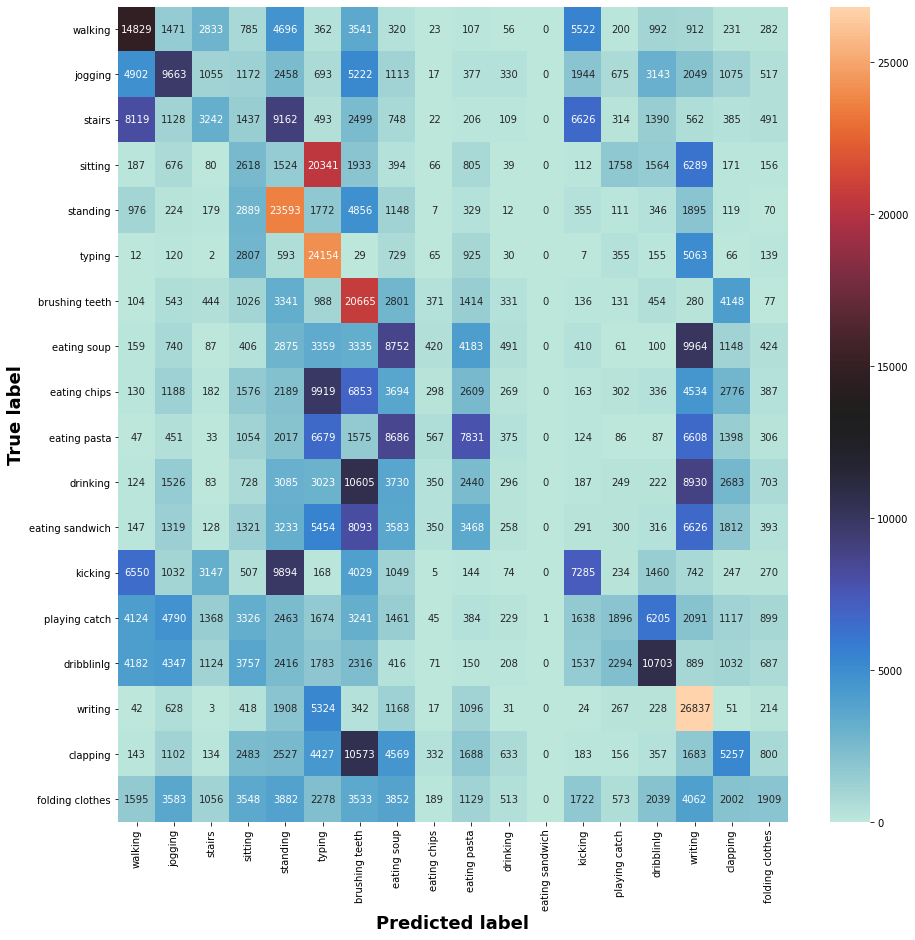

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_non_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="icefire", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

## [b] LDA

In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd')

In [ ]:
# Training 
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Training accuracy
y_pred = lda.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 25.473800319685918%


In [ ]:
# Validation
y_pred = lda.predict(X_val)

In [ ]:
# Validation accuracy 
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        walking       0.32      0.41      0.36     29627
        jogging       0.28      0.25      0.27     28844
         stairs       0.23      0.05      0.09     29408
        sitting       0.20      0.20      0.20     30908
       standing       0.28      0.62      0.38     31259
         typing       0.27      0.68      0.38     28543
 brushing teeth       0.22      0.56      0.31     29782
    eating soup       0.19      0.32      0.24     29614
   eating chips       0.12      0.01      0.01     29687
   eating pasta       0.28      0.16      0.21     30146
       drinking       0.12      0.02      0.04     31333
eating sandwich       0.00      0.00      0.00     29596
        kicking       0.28      0.23      0.25     29538
  playing catch       0.25      0.04      0.07     29159
     dribblinlg       0.32      0.20      0.25     30090
        writing       0.31      0.67      0.42     31306
       clapping       0.18    

In [ ]:
# Test accuracy
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 25.433681307508138%


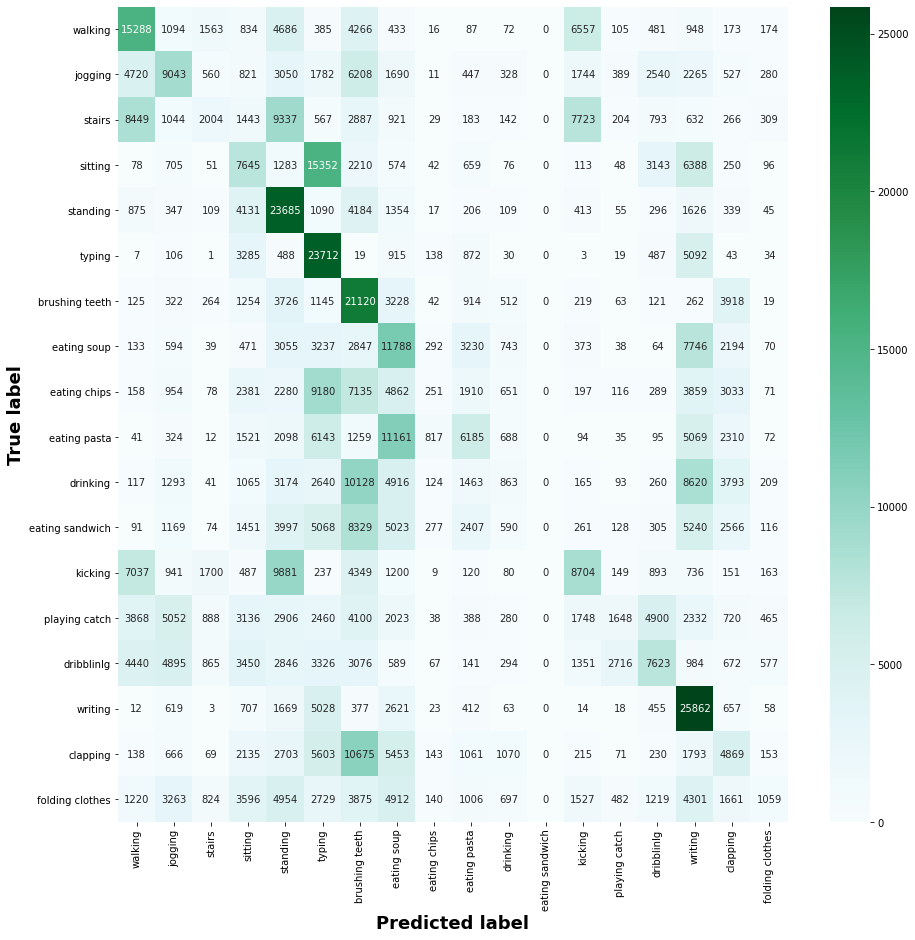

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

# Non-linear Models

## [a] QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()

In [ ]:
# Fit the training set
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Training accuracy
y_pred = qda.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 30.897189342936898%


In [ ]:
# Validation
y_pred = qda.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.39      0.39      0.39     29627
        jogging       0.48      0.39      0.43     28844
         stairs       0.23      0.08      0.11     29408
        sitting       0.33      0.21      0.26     30908
       standing       0.32      0.63      0.42     31259
         typing       0.29      0.76      0.41     28543
 brushing teeth       0.29      0.46      0.36     29782
    eating soup       0.20      0.23      0.22     29614
   eating chips       0.18      0.06      0.09     29687
   eating pasta       0.31      0.29      0.30     30146
       drinking       0.25      0.32      0.28     31333
eating sandwich       0.08      0.00      0.01     29596
        kicking       0.24      0.21      0.22     29538
  playing catch       0.32      0.13      0.18     29159
     dribblinlg       0.45      0.34      0.39     30090
        writing       0.38      0.54      0.45     31306
       clapping       0.31    

In [ ]:
# Test accuracy
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 30.85842700631875%


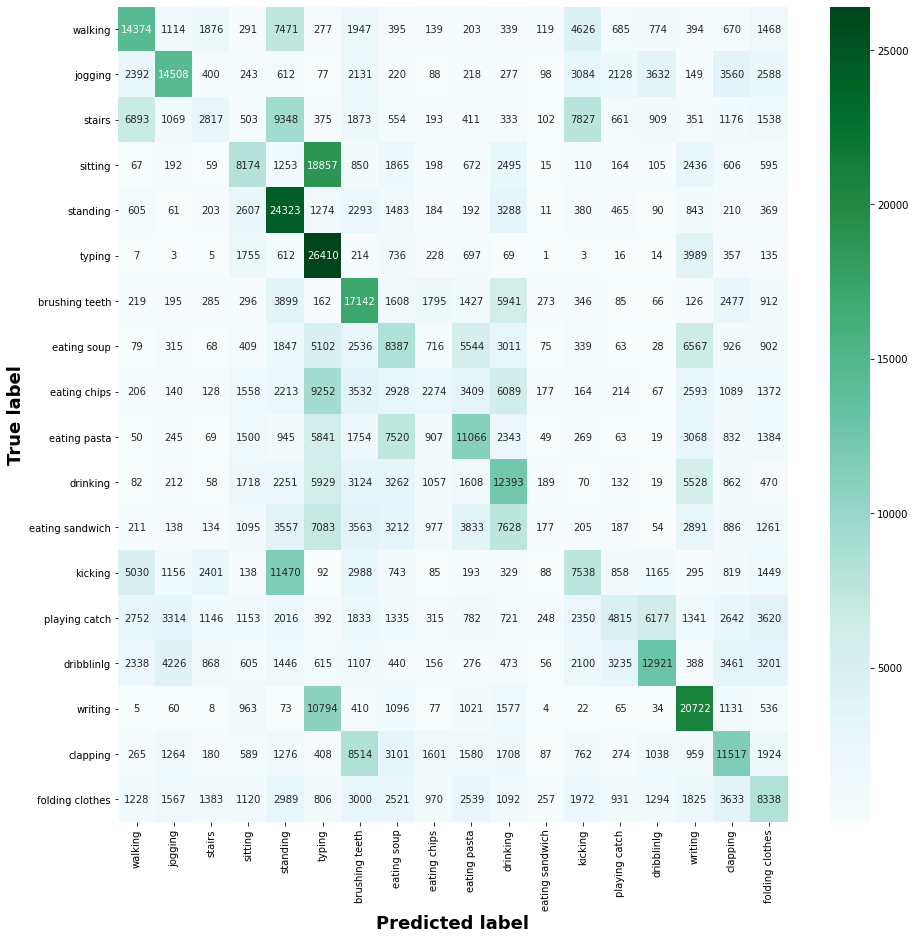

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

## [b] KNN

### KNN with n=5 (default) neighbors

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the training set
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Training 
y_pred = knn_clf.predict(X_train)

In [ ]:
# Training accuracy
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 65.4091673601235%


In [ ]:
# Validation
y_pred = knn_clf.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.45      0.61      0.52     29627
        jogging       0.55      0.63      0.58     28844
         stairs       0.36      0.37      0.36     29408
        sitting       0.70      0.78      0.74     30908
       standing       0.76      0.84      0.80     31259
         typing       0.60      0.72      0.65     28543
 brushing teeth       0.51      0.62      0.56     29782
    eating soup       0.41      0.47      0.44     29614
   eating chips       0.40      0.36      0.38     29687
   eating pasta       0.44      0.42      0.43     30146
       drinking       0.56      0.57      0.56     31333
eating sandwich       0.51      0.40      0.45     29596
        kicking       0.41      0.31      0.35     29538
  playing catch       0.41      0.31      0.35     29159
     dribblinlg       0.57      0.50      0.53     30090
        writing       0.70      0.70      0.70     31306
       clapping       0.61    

In [ ]:
# Test accuracy
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 52.60416589358313%


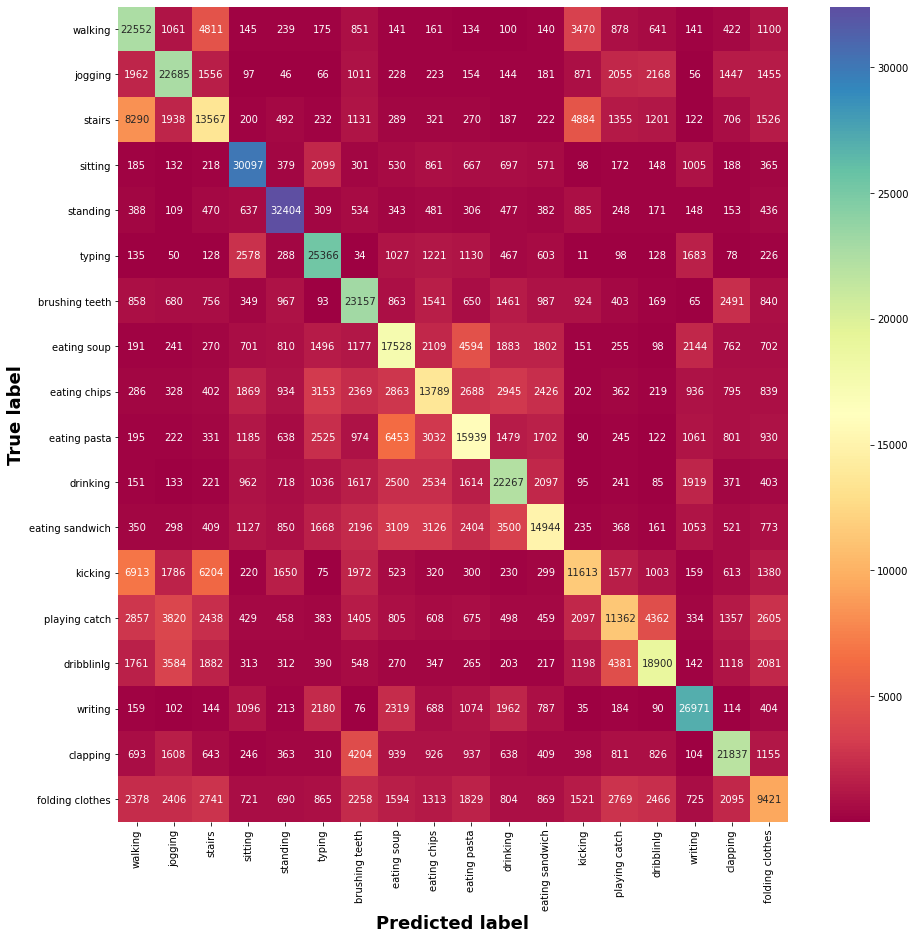

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="Spectral", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

### KNN with n=25 neighbors

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=25)

In [ ]:
# Train the model
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
# training 
y_pred = knn_clf.predict(X_train)

In [ ]:
# training acuracy
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 56.84430293905094%


In [ ]:
# validation
y_pred = knn_clf.predict(X_val)

In [ ]:
# validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.52      0.61      0.56     29627
        jogging       0.62      0.63      0.62     28844
         stairs       0.42      0.35      0.38     29408
        sitting       0.74      0.75      0.75     30908
       standing       0.77      0.83      0.80     31259
         typing       0.60      0.73      0.66     28543
 brushing teeth       0.50      0.64      0.56     29782
    eating soup       0.42      0.44      0.43     29614
   eating chips       0.42      0.32      0.37     29687
   eating pasta       0.43      0.45      0.44     30146
       drinking       0.52      0.57      0.55     31333
eating sandwich       0.50      0.39      0.44     29596
        kicking       0.42      0.36      0.39     29538
  playing catch       0.44      0.28      0.34     29159
     dribblinlg       0.58      0.55      0.56     30090
        writing       0.66      0.76      0.70     31306
       clapping       0.57    

In [ ]:
# Test accuracy
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 53.599402709478426%


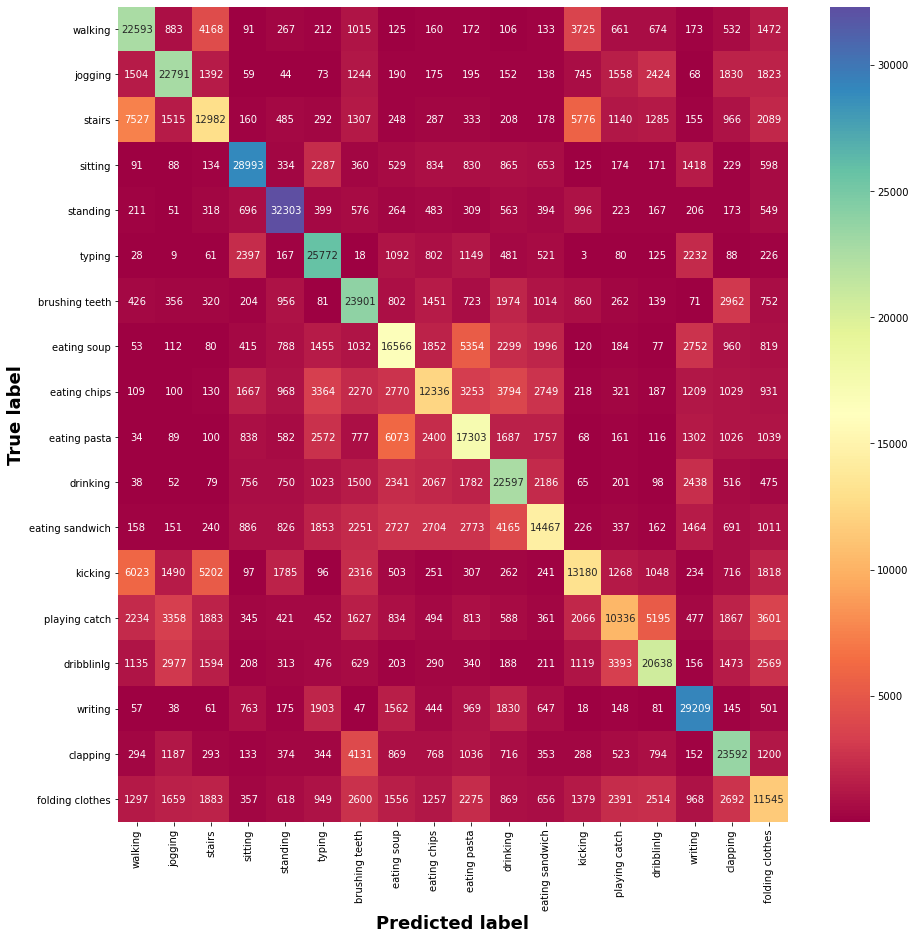

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="Spectral", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

# Tree-based Models

## [a] Decision Tree

In [ ]:
decision_classifier = DecisionTreeClassifier()

In [ ]:
# Fit the data
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# training status
y_pred = decision_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 99.97838455636852%


In [ ]:
# Validation
y_pred = decision_classifier.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.45      0.45      0.45     29627
        jogging       0.52      0.52      0.52     28844
         stairs       0.32      0.32      0.32     29408
        sitting       0.71      0.72      0.71     30908
       standing       0.76      0.76      0.76     31259
         typing       0.60      0.60      0.60     28543
 brushing teeth       0.47      0.48      0.48     29782
    eating soup       0.39      0.39      0.39     29614
   eating chips       0.33      0.33      0.33     29687
   eating pasta       0.39      0.39      0.39     30146
       drinking       0.49      0.50      0.49     31333
eating sandwich       0.38      0.39      0.38     29596
        kicking       0.32      0.32      0.32     29538
  playing catch       0.30      0.30      0.30     29159
     dribblinlg       0.46      0.46      0.46     30090
        writing       0.64      0.62      0.63     31306
       clapping       0.53    

In [ ]:
# Test accuracy
y_pred = decision_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Testing Accuracy: ' + str(accuracy) + '%')

Testing Accuracy: 46.337810538377845%


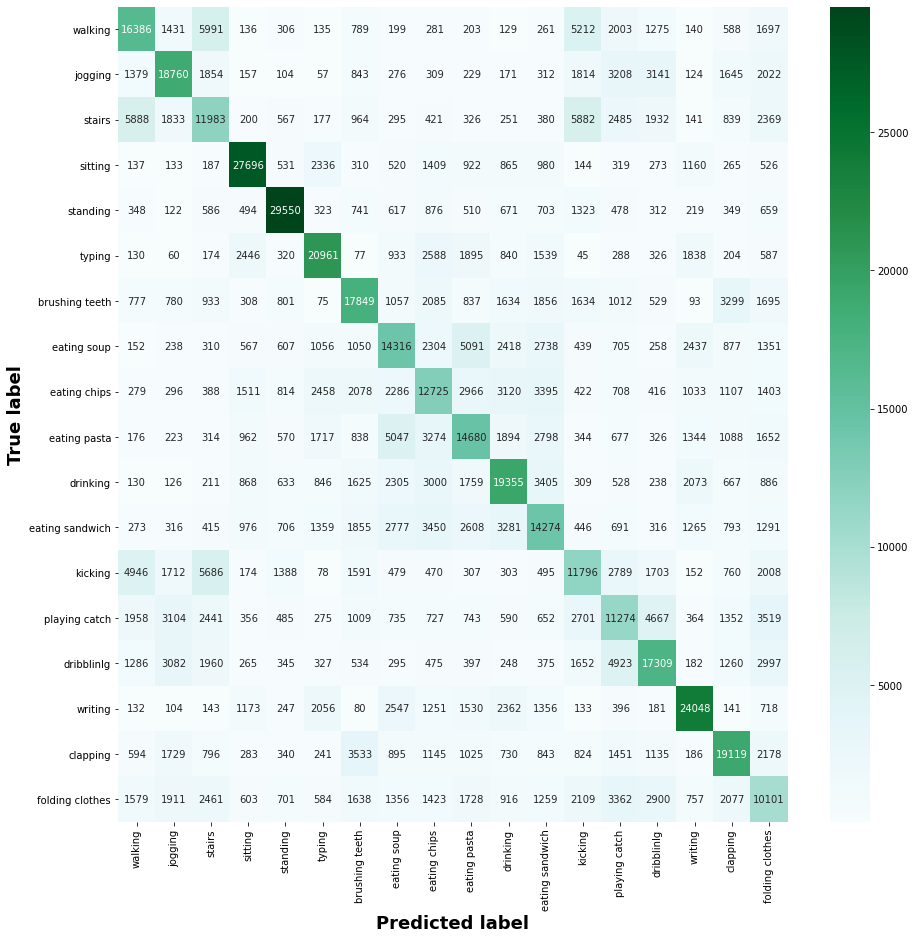

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

### Using Feature selection

ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [ ]:
decision_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_features="sqrt")

In [ ]:
# select the features by fitting the train set
sfs = SequentialFeatureSelector(decision_classifier)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=10,
                                                           max_features='sqrt'))

In [ ]:
# check the selected features
sfs.get_support()

array([ True,  True, False, False, False,  True])

In [ ]:
# transform the data 
X_train = sfs.transform(X_train)
X_val = sfs.transform(X_val)
X_test = sfs.transform(X_test)

In [ ]:
X_train.shape

(2155866, 3)

In [ ]:
X_val.shape


(538967, 3)

In [ ]:
X_test.shape

(673709, 3)

In [ ]:
# Fit the new set of inputs
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

In [ ]:
# Training accuracy
y_pred = decision_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 36.16286912080807%


In [ ]:
# Validation
y_pred = decision_classifier.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.38      0.46      0.41     29627
        jogging       0.49      0.40      0.44     28844
         stairs       0.28      0.25      0.26     29408
        sitting       0.49      0.56      0.52     30908
       standing       0.62      0.70      0.66     31259
         typing       0.44      0.57      0.50     28543
 brushing teeth       0.31      0.52      0.38     29782
    eating soup       0.26      0.24      0.25     29614
   eating chips       0.25      0.06      0.10     29687
   eating pasta       0.28      0.39      0.33     30146
       drinking       0.27      0.24      0.25     31333
eating sandwich       0.36      0.10      0.15     29596
        kicking       0.35      0.33      0.34     29538
  playing catch       0.28      0.09      0.14     29159
     dribblinlg       0.30      0.34      0.32     30090
        writing       0.50      0.76      0.60     31306
       clapping       0.22    

In [ ]:
# Test accuracy
y_pred = decision_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Testing Accuracy: ' + str(accuracy) + '%')

Testing Accuracy: 35.9760668181663%


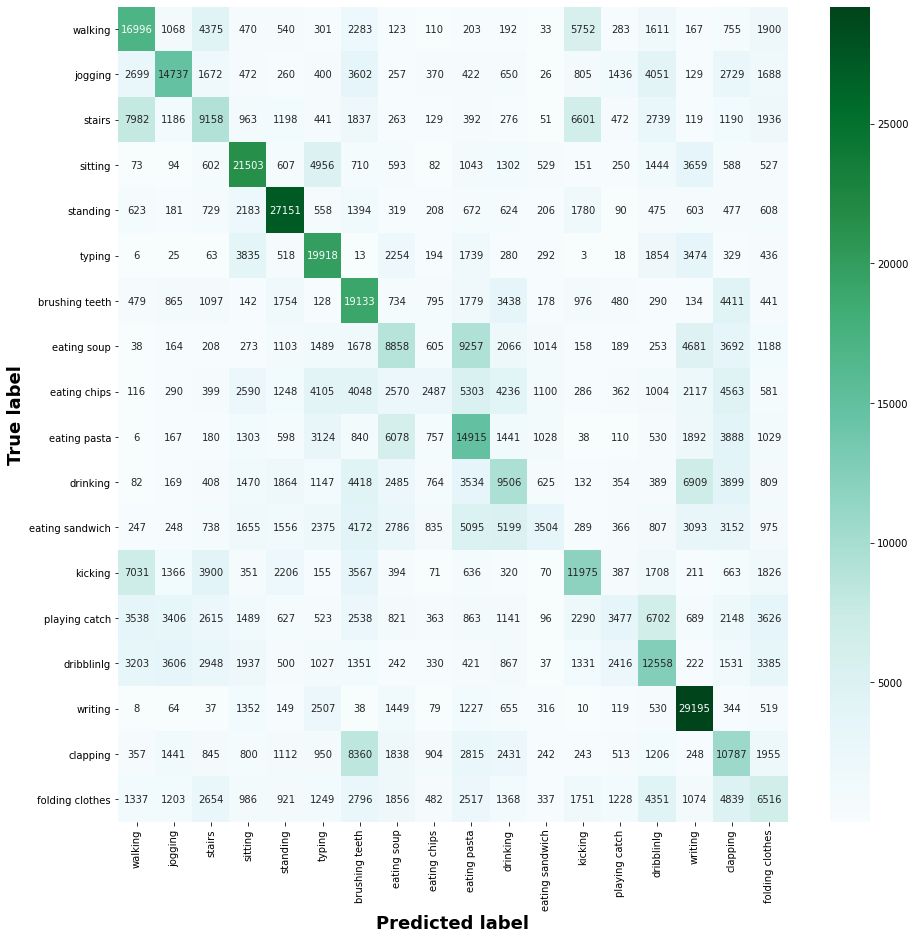

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

## [b] Random Forest Classifier

In [ ]:
random_classifier = RandomForestClassifier(n_estimators = 20)

In [ ]:
# train
random_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
# Predict and check the accuracy
y_pred = random_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 99.80467246108988%


In [ ]:
# Validation
y_pred = random_classifier.predict(X_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_val, y_pred)*100
print(classification_report(y_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.53      0.58      0.55     29627
        jogging       0.60      0.65      0.62     28844
         stairs       0.42      0.38      0.40     29408
        sitting       0.82      0.76      0.79     30908
       standing       0.82      0.83      0.82     31259
         typing       0.62      0.79      0.70     28543
 brushing teeth       0.53      0.67      0.59     29782
    eating soup       0.47      0.50      0.49     29614
   eating chips       0.47      0.38      0.42     29687
   eating pasta       0.47      0.50      0.48     30146
       drinking       0.61      0.58      0.60     31333
eating sandwich       0.57      0.41      0.48     29596
        kicking       0.43      0.39      0.41     29538
  playing catch       0.44      0.35      0.39     29159
     dribblinlg       0.58      0.57      0.58     30090
        writing       0.69      0.79      0.74     31306
       clapping       0.62    

In [ ]:
# Test accuracy
y_pred = random_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 56.26821075568235%


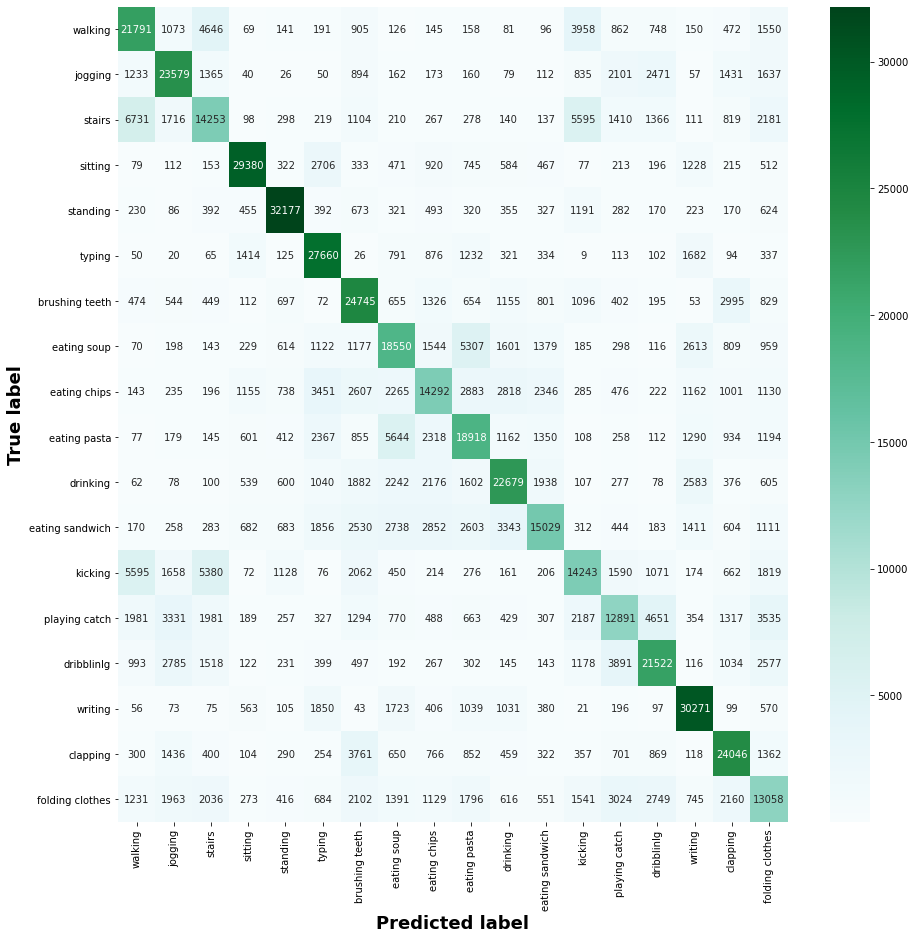

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

### Using PCA

In [ ]:
# ref : https://intellipaat.com/community/9495/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn

random_classifier = RandomForestClassifier(n_estimators = 30, max_features=None, max_depth= 10)

In [ ]:
# fit to the PCA dataset
random_classifier.fit(X_pca_train, y_pca_train)

RandomForestClassifier(max_depth=10, max_features=None, n_estimators=30)

In [ ]:
# Training accuracy
y_pred = random_classifier.predict(X_pca_train)
accuracy = accuracy_score(y_pca_train, y_pred)*100
print('Training Accuracy: ' + str(accuracy) + '%')

Training Accuracy: 33.39590679569138%


In [ ]:
# Validate 
y_pred = random_classifier.predict(X_pca_val)

In [ ]:
# Validation accuracy
accuracy = accuracy_score(y_pca_val, y_pred)*100
print(classification_report(y_pca_val, y_pred, target_names = activities))
print('Validation Accuracy: ' + str(accuracy) + '%')

                 precision    recall  f1-score   support

        walking       0.31      0.44      0.36     29627
        jogging       0.37      0.31      0.34     28844
         stairs       0.22      0.11      0.15     29408
        sitting       0.47      0.57      0.51     30908
       standing       0.59      0.71      0.64     31259
         typing       0.41      0.59      0.48     28543
 brushing teeth       0.25      0.40      0.30     29782
    eating soup       0.25      0.22      0.24     29614
   eating chips       0.29      0.08      0.13     29687
   eating pasta       0.24      0.29      0.26     30146
       drinking       0.28      0.33      0.30     31333
eating sandwich       0.27      0.13      0.17     29596
        kicking       0.28      0.28      0.28     29538
  playing catch       0.33      0.07      0.11     29159
     dribblinlg       0.35      0.31      0.33     30090
        writing       0.38      0.69      0.49     31306
       clapping       0.27    

In [ ]:
# Test Accuracy
y_pred = random_classifier.predict(X_pca_test)
accuracy = accuracy_score(y_pca_test, y_pred)*100
print('Test Accuracy: ' + str(accuracy) + '%')

Test Accuracy: 33.007426054869384%


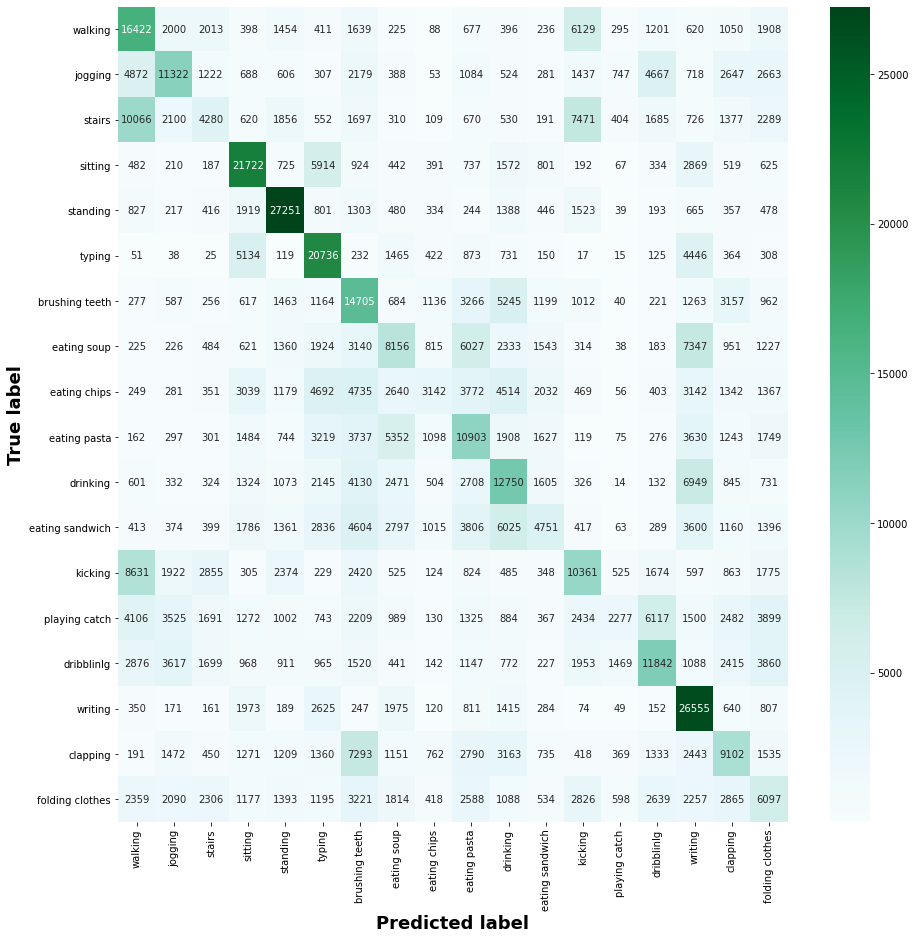

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_pca_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activities], columns = [i for i in activities])
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()